In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [19]:
df = pd.read_csv('./csvfiles/mldata/kyphosis.csv')

In [20]:
# sns.pairplot(df, palette='Set1', hue='Kyphosis')

In [21]:
y = df['Kyphosis']
x = df.drop('Kyphosis', axis=1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [47]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.79      0.94      0.86        16
     present       0.50      0.20      0.29         5

    accuracy                           0.76        21
   macro avg       0.64      0.57      0.57        21
weighted avg       0.72      0.76      0.72        21



In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
predictions2 = rfc.predict(x_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        16
     present       1.00      0.20      0.33         5

    accuracy                           0.81        21
   macro avg       0.90      0.60      0.61        21
weighted avg       0.85      0.81      0.76        21



# ============================================================================
# ============================================================================

In [56]:
df = pd.read_csv('./csvfiles/mldata/loan_data.csv')

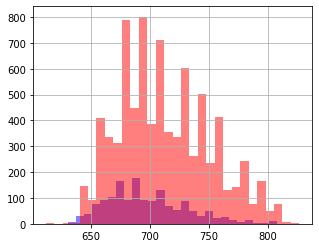

In [57]:
# 돈을 다 갚은 사람과 안갚은 사람의 fico 신용평가점수
plt.figure(figsize=(5,4))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid')

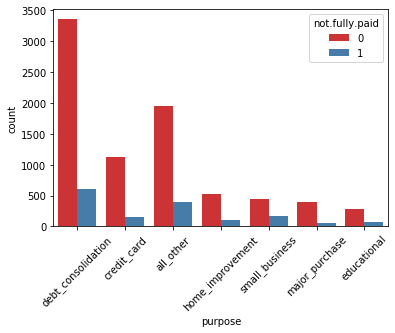

In [58]:
chart = sns.countplot(x='purpose', data=df, palette='Set1', hue='not.fully.paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

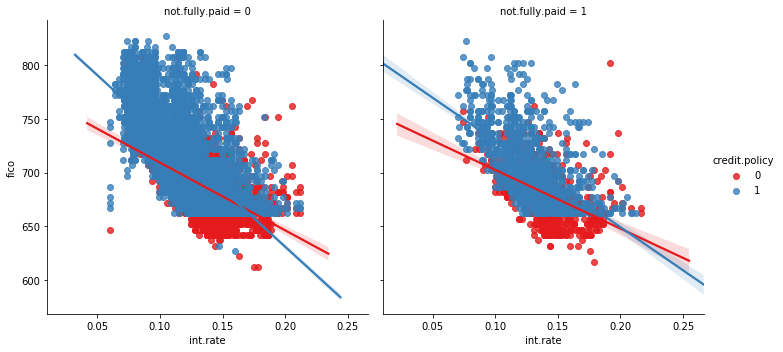

In [59]:
sns.lmplot(x='int.rate',y='fico', data=df, col='not.fully.paid', palette='Set1', hue='credit.policy')

In [60]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid', axis=1)

In [61]:
x = pd.get_dummies(x, drop_first=True)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=77)

In [63]:
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2451
           1       0.20      0.22      0.21       423

    accuracy                           0.76      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.76      0.76      2874



In [64]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train, y_train)
predictions2 = rfc.predict(x_test)
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2451
           1       0.29      0.01      0.02       423

    accuracy                           0.85      2874
   macro avg       0.57      0.50      0.47      2874
weighted avg       0.77      0.85      0.79      2874

